In [1]:
!pip install scipy

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

##############
file_name='d.DBN_results/40_DBN_results.csv'
df = pd.read_csv(file_name, encoding="UTF-8").copy()
df['Node'] = df['Node'].map(lambda x : 'Node '+str(x))
df.rename(columns={'1':'probability (100s elapsed)', '2':'probability (200s elapsed)', '3':'probability (300s elapsed)', '4': 'probability (400s elapsed)'}, inplace=True)
first_slice=df[['Node', 'probability (100s elapsed)']]
second_slice=df[['Node', 'probability (200s elapsed)']]
third_slice=df[['Node', 'probability (300s elapsed)']]
fourth_slice = df[['Node', 'probability (400s elapsed)']]

In [3]:
##############
file_name = "d.smokedetector_t/2870_smokep_avg.csv"
sd=pd.read_csv(file_name, encoding='UTF-8')
sd_df=sd.copy()
sd_df=sd_df.fillna(0)
sd_df

,Unnamed: 0,100s,200s,300s,400s
0,Node 1,0.000015,0.000919,0.006005,0.017248
1,Node 2,0.000006,0.001124,0.006549,0.018651
2,Node 3,0.000093,0.001710,0.006439,0.014630
3,Node 4,0.000062,0.001320,0.006346,0.015793
4,Node 5,0.000008,0.000531,0.004324,0.014387
...,...,...,...,...,...
60,Node 61,0.000028,0.001568,0.006051,0.013661
61,Node 62,0.000071,0.001529,0.005619,0.013032
62,Node 63,0.000174,0.002620,0.007384,0.016534
63,Node 64,0.000008,0.001117,0.005245,0.012423


In [4]:
sd_df = sd_df.rename(columns = {'Unnamed: 0' : 'Node'})
sd_df

,Node,100s,200s,300s,400s
0,Node 1,0.000015,0.000919,0.006005,0.017248
1,Node 2,0.000006,0.001124,0.006549,0.018651
2,Node 3,0.000093,0.001710,0.006439,0.014630
3,Node 4,0.000062,0.001320,0.006346,0.015793
4,Node 5,0.000008,0.000531,0.004324,0.014387
...,...,...,...,...,...
60,Node 61,0.000028,0.001568,0.006051,0.013661
61,Node 62,0.000071,0.001529,0.005619,0.013032
62,Node 63,0.000174,0.002620,0.007384,0.016534
63,Node 64,0.000008,0.001117,0.005245,0.012423


#### Pearson 상관계수

In [5]:
df

,Node,probability (100s elapsed),probability (200s elapsed),probability (300s elapsed),probability (400s elapsed)
0,Node 1,0.4604,0.6343,0.7364,0.8194
1,Node 2,0.4468,0.6067,0.7193,0.8098
2,Node 3,0.9145,0.9325,0.9523,0.9680
3,Node 4,0.8864,0.9093,0.9358,0.9568
4,Node 5,0.5028,0.6901,0.7855,0.8595
...,...,...,...,...,...
60,Node 61,0.4372,0.7284,0.8460,0.9184
61,Node 62,0.8848,0.9273,0.9526,0.9710
62,Node 63,0.9481,0.9607,0.9713,0.9811
63,Node 64,0.4461,0.6724,0.7670,0.8460


<Axes: >

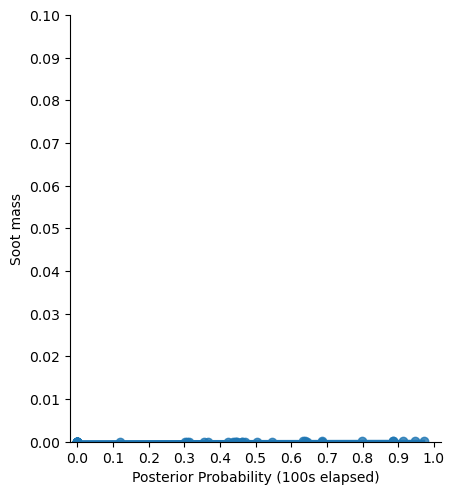

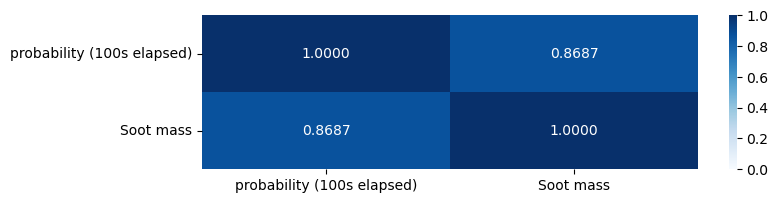

In [6]:
# 100s elapsed
sd_df_1st = sd_df[['Node', '100s']]
sd_df_1st = sd_df_1st.rename(columns = {'100s':'Soot mass'})

df_1st=pd.merge(first_slice, sd_df_1st)
set_1 = set(df_1st[(df_1st['probability (100s elapsed)'] == 1)].index.tolist())
#set_2 = set(df_1st[(df_1st['Soot mass'] == 0)].index.tolist())
df_1st_index = list((set_1))
df_1st.drop(df_1st_index, inplace=True)

g1= sns.lmplot(data=df_1st, x='probability (100s elapsed)', y='Soot mass', ci=None)
g1=(g1.set_axis_labels("Posterior Probability (100s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], yticks=[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10])
plt.figure(figsize=(8,2))
df_1st_corr=df_1st[['probability (100s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_1st_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

<Axes: >

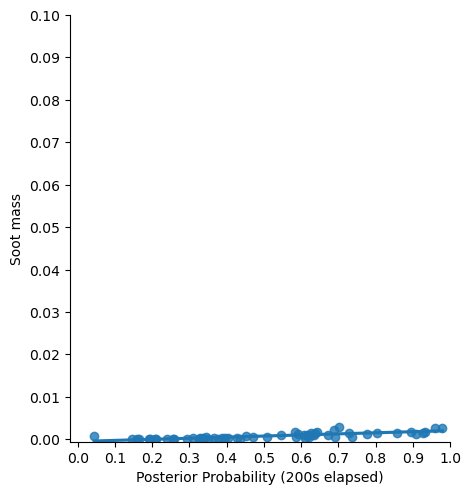

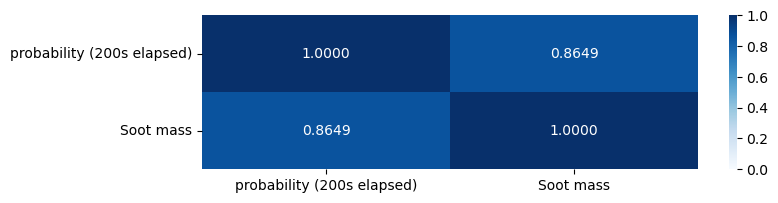

In [7]:
# 200s elapsed
sd_df_2nd = sd_df[['Node', '200s']]
sd_df_2nd = sd_df_2nd.rename(columns = {'200s':'Soot mass'})

df_2nd=pd.merge(second_slice, sd_df_2nd)
set_1 = set(df_2nd[(df_2nd['probability (200s elapsed)'] == 1)].index.tolist())
#set_2 = set(df_2nd[(df_2nd['Soot mass'] == 0)].index.tolist())
df_2nd_index = list((set_1))
df_2nd.drop(df_2nd_index, inplace=True)

g2= sns.lmplot(data=df_2nd, x='probability (200s elapsed)', y='Soot mass', ci=None)
g2=(g2.set_axis_labels("Posterior Probability (200s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.0), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], yticks=[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10])
plt.figure(figsize=(8,2))
df_2nd_corr=df_2nd[['probability (200s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_2nd_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

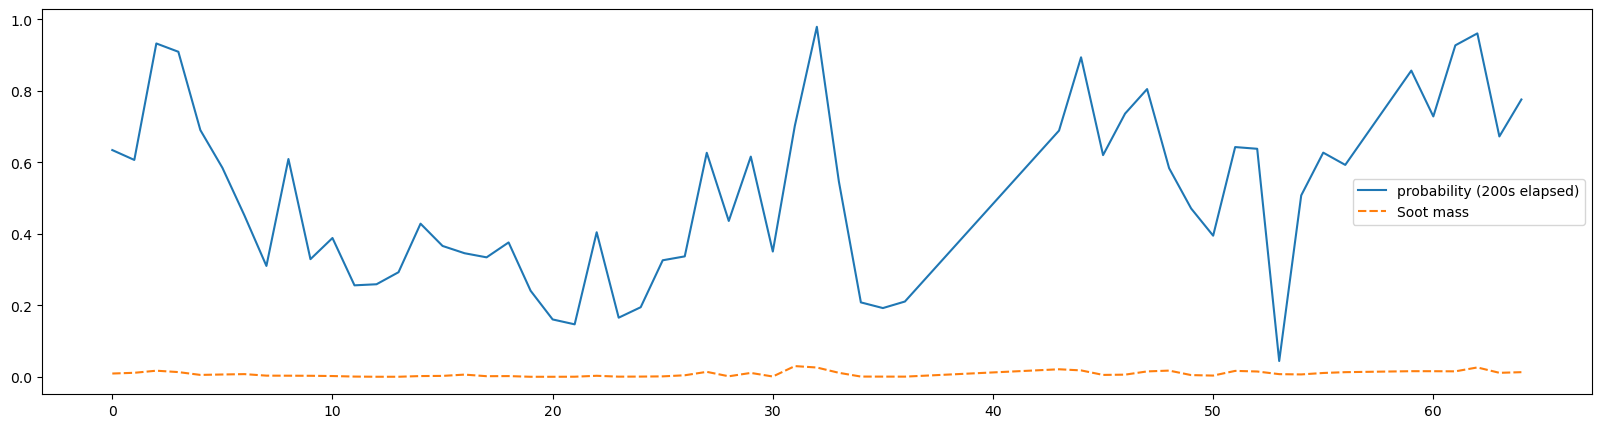

In [8]:
df_2nd_multiply = df_2nd.copy()
df_2nd_multiply['Soot mass'] = df_2nd_multiply['Soot mass']*10
plt.figure(figsize=(20,5))
lineplot_1= sns.lineplot(data=df_2nd_multiply[['probability (200s elapsed)', 'Soot mass']])

<Axes: >

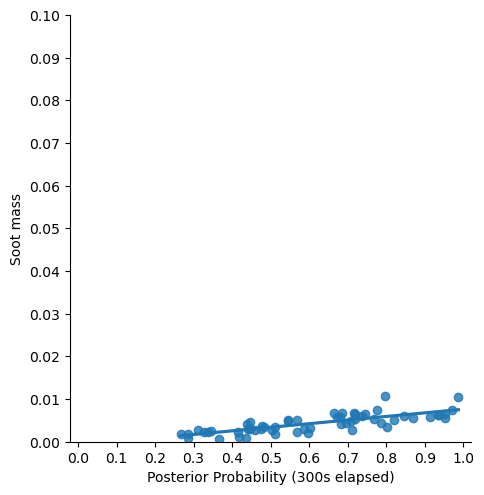

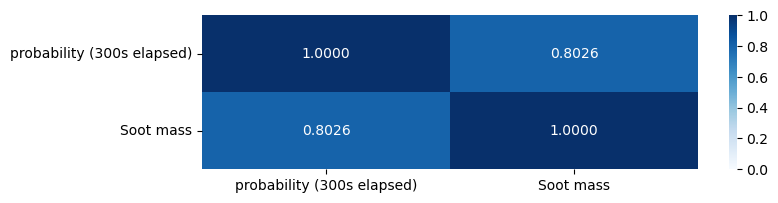

In [9]:
# 300s elapsed
sd_df_3rd = sd_df[['Node', '300s']]
sd_df_3rd = sd_df_3rd.rename(columns = {'300s':'Soot mass'})

df_3rd=pd.merge(third_slice, sd_df_3rd)
set_1 = set(df_3rd[(df_3rd['probability (300s elapsed)'] == 1)].index.tolist())
#set_2 = set(df_3rd[(df_3rd['Soot mass'] == 0)].index.tolist())
df_3rd_index = list(set_1)
df_3rd.drop(df_3rd_index, inplace=True)

g3= sns.lmplot(data=df_3rd, x='probability (300s elapsed)', y='Soot mass', ci=None)
g3=(g3.set_axis_labels("Posterior Probability (300s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], yticks = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
plt.figure(figsize=(8,2))
df_3rd_corr=df_3rd[['probability (300s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_3rd_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

<Axes: >

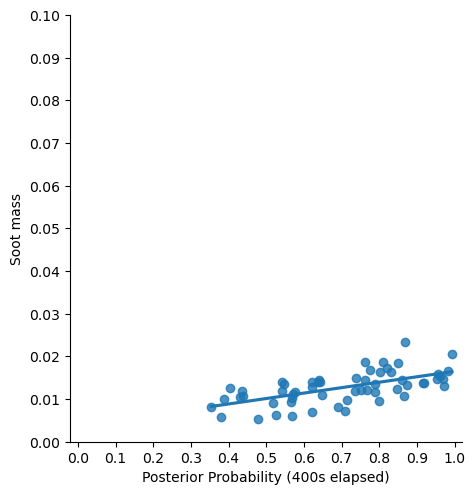

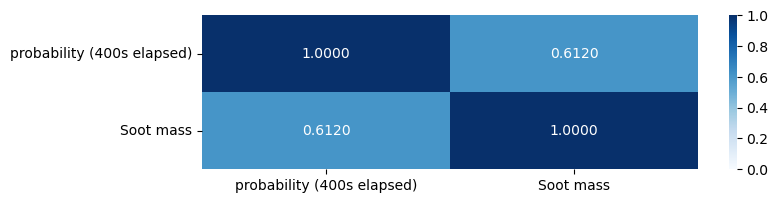

In [10]:
# 400s elapsed
sd_df_4th = sd_df[['Node', '400s']]
sd_df_4th = sd_df_4th.rename(columns = {'400s':'Soot mass'})

df_4th=pd.merge(fourth_slice, sd_df_4th)
set_1 = set(df_4th[(df_4th['probability (400s elapsed)'] == 1)].index.tolist())
#set_2 = set(df_4th[(df_4th['Soot mass'] == 0)].index.tolist())
df_4th_index = list((set_1))
df_4th.drop(df_4th_index, inplace=True)

g4= sns.lmplot(data=df_4th, x='probability (400s elapsed)', y='Soot mass', ci=None)
g4=(g4.set_axis_labels("Posterior Probability (400s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], yticks = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
plt.figure(figsize=(8,2))
df_4th_corr=df_4th[['probability (400s elapsed)', 'Soot mass']].corr(method='pearson')
sns.heatmap(df_4th_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

#### pearson & p-value 검정

In [11]:
p_df_1st = df_1st.dropna()
p_df_1st['probability (100s elapsed)'].values
p_df_1st['Soot mass'].values

p_df_2nd = df_2nd.dropna()
p_df_2nd['probability (200s elapsed)'].values
p_df_2nd['Soot mass'].values

p_df_3rd = df_3rd.dropna()
p_df_3rd['probability (300s elapsed)'].values
p_df_3rd['Soot mass'].values

p_df_4th = df_4th.dropna()
p_df_4th['probability (400s elapsed)'].values
p_df_4th['Soot mass'].values

print(stats.pearsonr(p_df_1st['probability (100s elapsed)'].values, p_df_1st['Soot mass'].values))
print(stats.pearsonr(p_df_2nd['probability (200s elapsed)'].values, p_df_2nd['Soot mass'].values))
print(stats.pearsonr(p_df_3rd['probability (300s elapsed)'].values, p_df_3rd['Soot mass'].values))
print(stats.pearsonr(p_df_4th['probability (400s elapsed)'].values, p_df_4th['Soot mass'].values))

PearsonRResult(statistic=0.7909303554386886, pvalue=2.4823439195695037e-13)
PearsonRResult(statistic=0.8170943450851165, pvalue=9.076593180575702e-15)
PearsonRResult(statistic=0.7781547916093784, pvalue=1.0578499103898375e-12)
PearsonRResult(statistic=0.6119791246001365, pvalue=4.2365750686060567e-07)


#### spearman & pvalue 상관계수

In [12]:
print(stats.spearmanr(p_df_1st['probability (100s elapsed)'].values, p_df_1st['Soot mass'].values))
print(stats.spearmanr(p_df_2nd['probability (200s elapsed)'].values, p_df_2nd['Soot mass'].values))
print(stats.spearmanr(p_df_3rd['probability (300s elapsed)'].values, p_df_3rd['Soot mass'].values))
print(stats.spearmanr(p_df_4th['probability (400s elapsed)'].values, p_df_4th['Soot mass'].values))

SignificanceResult(statistic=0.8687024413341152, pvalue=2.031803209003604e-18)
SignificanceResult(statistic=0.8648561057816957, pvalue=4.265376937261057e-18)
SignificanceResult(statistic=0.8026315789473686, pvalue=6.008028620199149e-14)
SignificanceResult(statistic=0.6523852735286493, pvalue=3.8351942256521446e-08)


In [13]:
!pip install statannot

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
%matplotlib inline

In [15]:
import math
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_squared_error

pred1_value = p_df_1st['probability (100s elapsed)'].values
true1_value = p_df_1st['Soot mass'].values
rmse1 = math.sqrt(mean_squared_error(true1_value,pred1_value))
print('rmse1:', rmse1)

pred2_value = p_df_2nd['probability (200s elapsed)'].values
true2_value = p_df_2nd['Soot mass'].values
rmse2 = math.sqrt(mean_squared_error(true2_value,pred2_value))
print('rmse2:', rmse2)

pred3_value = p_df_3rd['probability (300s elapsed)'].values
true3_value = p_df_3rd['Soot mass'].values
rmse3 = math.sqrt(mean_squared_error(true3_value,pred3_value))
print('rmse3:', rmse3)

pred4_value = p_df_4th['probability (400s elapsed)'].values
true4_value = p_df_4th['Soot mass'].values
rmse4 = math.sqrt(mean_squared_error(true4_value,pred4_value))
print('rmse4:', rmse4)

rmse1: 0.4139488103930596
rmse2: 0.5629738654838764
rmse3: 0.6451416296403041
rmse4: 0.7122427860837411


In [16]:
import numpy as np

def fft_calculation(predict, observe):
    # 예측값과 관측값의 FFT 계산
    predicted_fft = np.fft.fft(predict)
    observed_fft = np.fft.fft(observe)

    # 상관관계 계산
    correlation = np.corrcoef(np.abs(predicted_fft), np.abs(observed_fft))[0, 1]
    
    print(f"FFT 그래프 간의 상관관계: {correlation}")
    
fft_calculation(pred1_value,true1_value)
fft_calculation(pred2_value,true2_value)
fft_calculation(pred3_value,true3_value)
fft_calculation(pred4_value,true4_value)

FFT 그래프 간의 상관관계: 0.8159934633981748
FFT 그래프 간의 상관관계: 0.946800771151401
FFT 그래프 간의 상관관계: 0.9816820395637601
FFT 그래프 간의 상관관계: 0.9899687004980218


In [17]:
import math
import numpy as np
p_df_1st = df_1st.dropna()
p_df_2nd = df_2nd.dropna()
p_df_3rd = df_3rd.dropna()
p_df_4th = df_4th.dropna()
def Z_normalized(rawdata):
    XMIN = min(rawdata)
    XMAX = max(rawdata)
    XNORM = (rawdata-XMIN) / (XMAX-XMIN)
    
    return XNORM

def pearsonr(dataset1, dataset2): #dataset 2에 정규화한쪽 넣기
    pear = stats.pearsonr(dataset1, dataset2) 
    return pear

def spearmanr(dataset1, dataset2): #dataset 2에 정규화한쪽 넣기
    spear = stats.spearmanr(dataset1, dataset2)
    return spear

In [18]:
#### spearman & pvalue 상관계수

Z_1=Z_normalized(p_df_1st['Soot mass'].values)
Z_2=Z_normalized(p_df_2nd['Soot mass'].values)
Z_3=Z_normalized(p_df_3rd['Soot mass'].values)
Z_4=Z_normalized(p_df_4th['Soot mass'].values)

print('.............PEARSON COEFFICIENT..............')
print('1:', pearsonr(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('2:', pearsonr(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('3:', pearsonr(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('4:', pearsonr(p_df_4th['probability (400s elapsed)'].values,Z_4))
print('.............SPEARMAN COEFFICIENT..............')
print('1:', spearmanr(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('2:', spearmanr(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('3:', spearmanr(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('4:', spearmanr(p_df_4th['probability (400s elapsed)'].values,Z_4))

.............PEARSON COEFFICIENT..............
1: PearsonRResult(statistic=0.7909303554386883, pvalue=2.4823439195696334e-13)
2: PearsonRResult(statistic=0.8170943450851165, pvalue=9.076593180575702e-15)
3: PearsonRResult(statistic=0.7781547916093785, pvalue=1.0578499103898196e-12)
4: PearsonRResult(statistic=0.6119791246001367, pvalue=4.2365750686060287e-07)
.............SPEARMAN COEFFICIENT..............
1: SignificanceResult(statistic=0.8687024413341152, pvalue=2.031803209003604e-18)
2: SignificanceResult(statistic=0.8648561057816957, pvalue=4.265376937261057e-18)
3: SignificanceResult(statistic=0.8026315789473686, pvalue=6.008028620199149e-14)
4: SignificanceResult(statistic=0.6523852735286493, pvalue=3.8351942256521446e-08)


FFT 그래프 간의 상관관계: 0.8159934633981748


C:\Users\lablj\AppData\Local\Temp\ipykernel_56516\3580565654.py:24: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 30, 10)


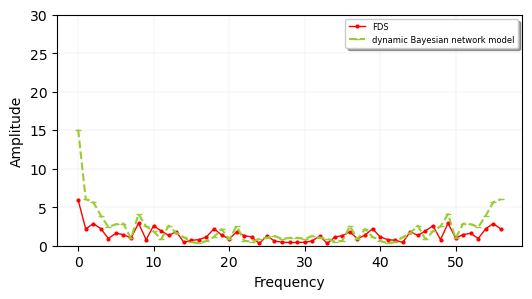

FFT 그래프 간의 상관관계: 0.9452634642040426


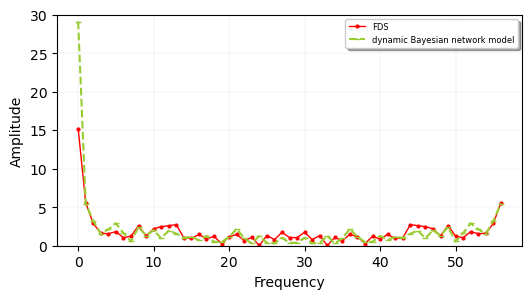

FFT 그래프 간의 상관관계: 0.9716141350420042


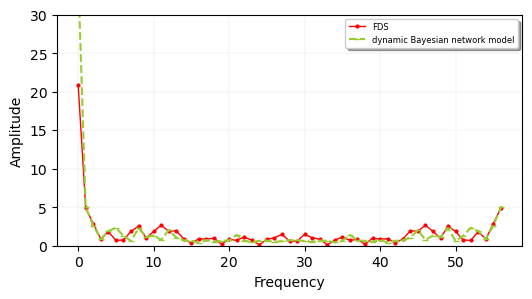

FFT 그래프 간의 상관관계: 0.9730779392213383


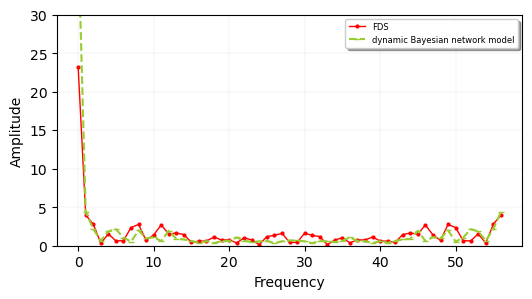

In [19]:
### 기타

import numpy as np

def fft_calculation(predict, observe, plot=True):
    # 예측값과 관측값의 FFT 계산
    predicted_fft = np.fft.fft(predict)
    observed_fft = np.fft.fft(observe)

    # 상관관계 계산
    correlation = np.corrcoef(np.abs(predicted_fft), np.abs(observed_fft))[0, 1]
    
    print(f"FFT 그래프 간의 상관관계: {correlation}")
    
    if plot == True:
        plt.figure(figsize=(6,3))
        plt.plot(np.abs(observed_fft), label='FDS', color = '#ff0000', marker='o', markersize=2, linewidth=1)
        plt.plot(np.abs(predicted_fft), label='dynamic Bayesian network model', color='#99CC33', linestyle='--', marker='_', markersize=5, linewidth=1.5)
        plt.legend(shadow=True, prop={'size':6})
        plt.grid(True, lw=0.1)
        #plt.title('FFT result comparison')
        plt.xlabel('Frequency')
        plt.ylabel('Amplitude')
        plt.ylim(0, 30, 10)
        plt.show()

        
fft_calculation(p_df_1st['probability (100s elapsed)'].values,Z_1)
fft_calculation(p_df_2nd['probability (200s elapsed)'].values,Z_2)
fft_calculation(p_df_3rd['probability (300s elapsed)'].values,Z_3)
fft_calculation(p_df_4th['probability (400s elapsed)'].values,Z_4)

In [20]:
list(Z_4)

[0.6592580793988448,
 0.7373956467641679,
 0.5135060232049429,
 0.5782535068995018,
 0.4999812659528206,
 0.4460245934335968,
 0.5021314223751554,
 0.26311315102832106,
 0.22705008237135066,
 0.40995668120425016,
 0.3646978398613647,
 0.2028881164287907,
 0.04603520475422792,
 0.028083088310739555,
 0.15721651364225564,
 0.2189024142090594,
 0.4507612175048487,
 0.3063469337319686,
 0.3475041600441021,
 0.0,
 0.025690864616083685,
 0.15271377287620627,
 0.4814163540938681,
 0.25919737329172904,
 0.4032148738424767,
 0.3672166088435058,
 0.47937130875942247,
 0.3729036865654168,
 0.1047018895332572,
 0.3479827829374196,
 0.08395642365981555,
 1.0,
 0.839545697407336,
 0.7332592359548511,
 0.30123863507239673,
 0.28129291537349316,
 0.363811855829231,
 0.7198436539375545,
 0.5558553807273365,
 0.37640046745484024,
 0.2934736091278291,
 0.45905976016299793,
 0.6320041884096209,
 0.2452718800170293,
 0.3168287583936465,
 0.6055009397922241,
 0.6084972182027685,
 0.47694473467216725,
 0.473